In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-kenya-dataset/Clean_Kenya_Tourism_datasets (2).csv


In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn import metrics


In [68]:
data=pd.read_csv('/kaggle/input/clean-kenya-dataset/Clean_Kenya_Tourism_datasets (2).csv')

In [69]:
data.head(10)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport,...,package_food,package_transport.1,package_sightseeing,package_guided_tour,package_insurance,nights_spent,payment_mode,first_trip_Kenya,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,13,Cash,No,Friendly People,674602.5
1,UNITED KINGDOM,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,No,14,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,UNITED KINGDOM,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,1,Cash,No,Excellent Experience,3315000.0
3,UNITED KINGDOM,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,Yes,Yes,No,11,Cash,Yes,Friendly People,7790250.0
4,CHINA,Jan-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,7,Cash,Yes,No comments,1657500.0
5,UNITED KINGDOM,25-44,Alone,0,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,No,No,Yes,Yes,No,9,Cash,Yes,Wildlife,120950.0
6,SOUTH AFRICA,45-64,Alone,0,1,Business,Mountain climbing,"Friends, relatives",Independent,No,...,No,No,No,No,No,9,Cash,Yes,Friendly People,466140.0
7,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,Yes,Yes,10,Cash,Yes,Friendly People,3480750.0
8,NIGERIA,25-44,Alone,0,1,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,4,Cash,Yes,Friendly People,994500.0
9,INDIA,25-44,Alone,1,0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,5,Credit Card,Yes,Friendly People,2486250.0


In [70]:
#checking the columns in the training dataset
data.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport', 'package_accomodation', 'package_food',
       'package_transport.1', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'nights_spent', 'payment_mode', 'first_trip_Kenya',
       'most_impressing', 'total_cost'],
      dtype='object')

In [ ]:
#checking the information of the training dataset
data.info()

In [ ]:
#step 2 is to clean the data
#replacing the nan values in the travel_with column of the training data with Alone

data['travel_with'] = data['travel_with'].replace(np.nan, 'Alone')

In [ ]:
#replacing the nan values in the total_female column of the training data with 1.0

data['total_female'] = data['total_female'].replace(np.nan, 1.0)


In [ ]:
#replacing the nan values in the total_male column of the training data with 1.0

data['total_male'] = data['total_male'].replace(np.nan, 1.0)


In [ ]:
#replacing the nan values in the most_impressing column of the training data with No comments

data['most_impressing'] = data['most_impressing'].replace(np.nan, 'No comments')


In [ ]:
#replacing 24-jan to 1-24 to correlate with 

data['age_group'] = data['age_group'].replace('24-Jan', '1-24')

In [ ]:
# %convert float dtypes to int[total_female,total_male,night_mainland,night_zanzibar]
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["nights_spent"] = data['nights_spent'].astype('int')

In [ ]:
# %Let's generate new features from some columns which makes some sense
data["total_people"] = data["total_female"] + data["total_male"]

data["total_nights"] = data["nights_spent"] 

In [ ]:
data.shape 

In [ ]:
#chech for missing values
data.isnull().sum()

In [ ]:
#statistical measures of the data
data.describe()

Understanding the correlation between various features in the dataset.
1) positive correlation
2)negative Correlation


In [ ]:
encoded_data = pd.get_dummies(data)
correlation = encoded_data.corr()


In [ ]:
#constructing heatmap to understand the correlation
#plt.figure(figsize=(10,10))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap='Blues')


In [143]:
# %then it's time to encode objects into numeric

for colname in data.select_dtypes("object"):
    data[colname],_=data[colname].factorize()
# Now all columns that can be converted to numeric have been converted


In [145]:
# Step 3 model building
import warnings
warnings.filterwarnings('ignore')

In [146]:
data.head()


,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport,...,package_sightseeing,package_guided_tour,package_insurance,nights_spent,payment_mode,first_trip_Kenya,most_impressing,total_cost,total_people,total_nights
0,89,0,0,1,1,0,0,0,0,0,...,0,0,0,13,0,0,0,674602.5,2,13
1,99,1,1,1,0,0,1,1,0,0,...,0,0,0,14,0,1,1,3214906.5,1,14
2,99,1,1,0,1,1,1,0,0,0,...,0,0,0,1,0,0,2,3315000.0,1,1
3,99,1,2,1,1,0,0,2,1,0,...,1,1,0,11,0,1,0,7790250.0,2,11
4,13,2,1,1,0,0,0,2,0,0,...,0,0,0,7,0,1,3,1657500.0,1,7


In [147]:
x=data.drop(['total_cost'], axis=1)
y=data['total_cost']

In [148]:
print(x)
print(y)

      country  age_group  travel_with  total_female  total_male  purpose  \
0          89          0            0             1           1        0   
1          99          1            1             1           0        0   
2          99          1            1             0           1        1   
3          99          1            2             1           1        0   
4          13          2            1             1           0        0   
...       ...        ...          ...           ...         ...      ...   
4804       95          0            1             0           1        2   
4805      100          1            2             1           1        0   
4806       64          2            1             1           0        0   
4807       83          1            0             1           1        2   
4808       99          1            2             1           1        0   

      main_activity  info_source  tour_arrangement  package_transport  ...  \
0        

In [149]:
print(y)

0         674602.5
1        3214906.5
2        3315000.0
3        7790250.0
4        1657500.0
           ...    
4804     3315000.0
4805    10690875.0
4806     2246636.7
4807     1160250.0
4808    13260000.0
Name: total_cost, Length: 4809, dtype: float64


In [150]:

data.shape

(4809, 23)

In [152]:
data[cols].shape

(4809, 22)

In [153]:
x.shape

(4809, 22)

In [154]:
y.shape

(4809,)

In [158]:
#splitting the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state= 2)

In [165]:
print(x.shape,x_train.shape,x_test.shape)

(4809, 22) (3847, 22) (962, 22)


In [166]:
#model Training
#XGBOOST REGRESSOR
#loading the model
model=XGBRegressor()

In [185]:
#training the model with x_train
# Instantiate an object of XGBModel class
model = XGBRegressor()

# Call the fit method on the instantiated object
model.fit(X=x_train, y=y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [187]:
#Evaluation 
training_data_prediction=model.predict(x_train)

In [188]:
#accuracy for prediction on training data ,the prices in ksh 
print(training_data_prediction)

[3812214.5  7097136.5  9178926.   ...  580518.06 4878601.   7226136.5 ]


In [193]:
#R squared error 
score_1=metrics.r2_score(y_train,training_data_prediction)
#find the variants btwn both 
#mean absolute error 
score_2= metrics.mean_absolute_error(y_train,training_data_prediction)
#find difference and give mean
print('R squared error :', score_1)
print('Mean absolute Error:', score_2)
      

R squared error : 0.9003957716217327
Mean absolute Error: 2142980.942337485


In [196]:
#prediction on training data
test_data_prediction=model.predict(x_test)

In [197]:
#R squared error 
score_1=metrics.r2_score(y_test,test_data_prediction)
#find the variants btwn both 
#mean absolute error 
score_2= metrics.mean_absolute_error(y_test,test_data_prediction)
#find difference and give mean
print('R squared error :', score_1)
print('Mean absolute Error:', score_2)

R squared error : 0.322482794598991
Mean absolute Error: 5380830.148457376


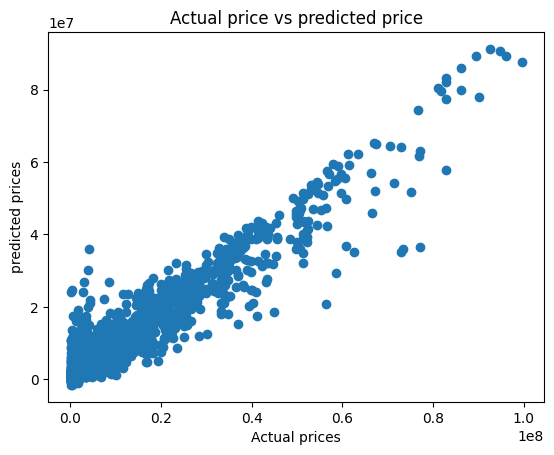

In [199]:
#visualizing the actual prices and predicted prices
#y train and y test
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title('Actual price vs predicted price')
plt.show

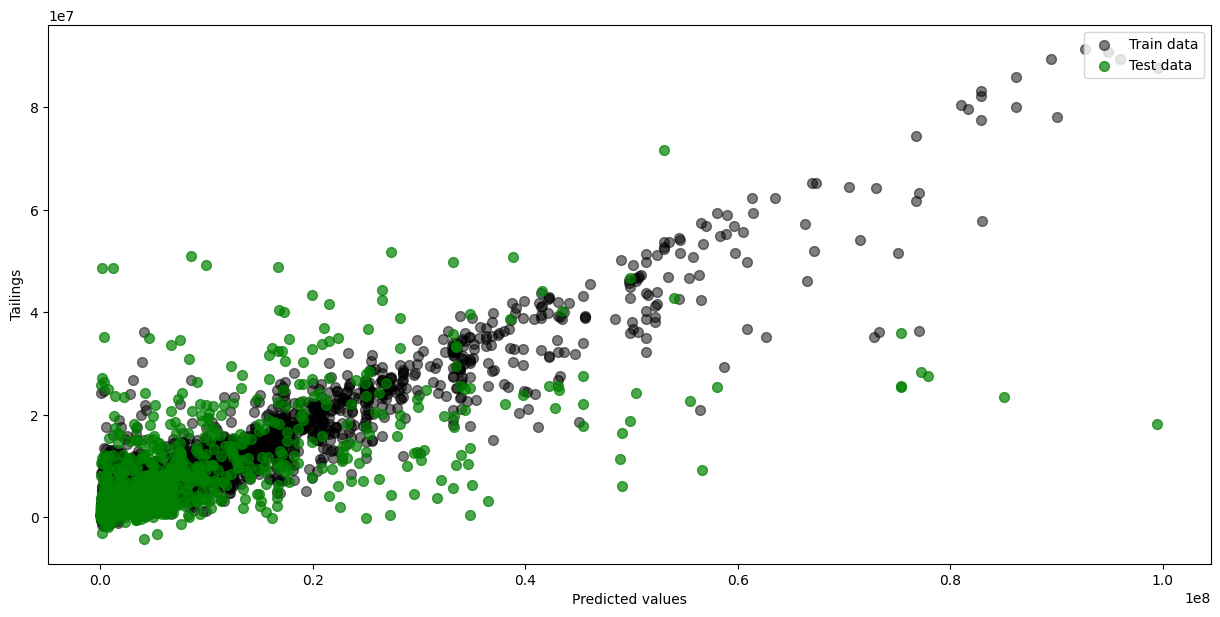

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.scatter(y_train,training_data_prediction,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test,test_data_prediction,
          c = 'g', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

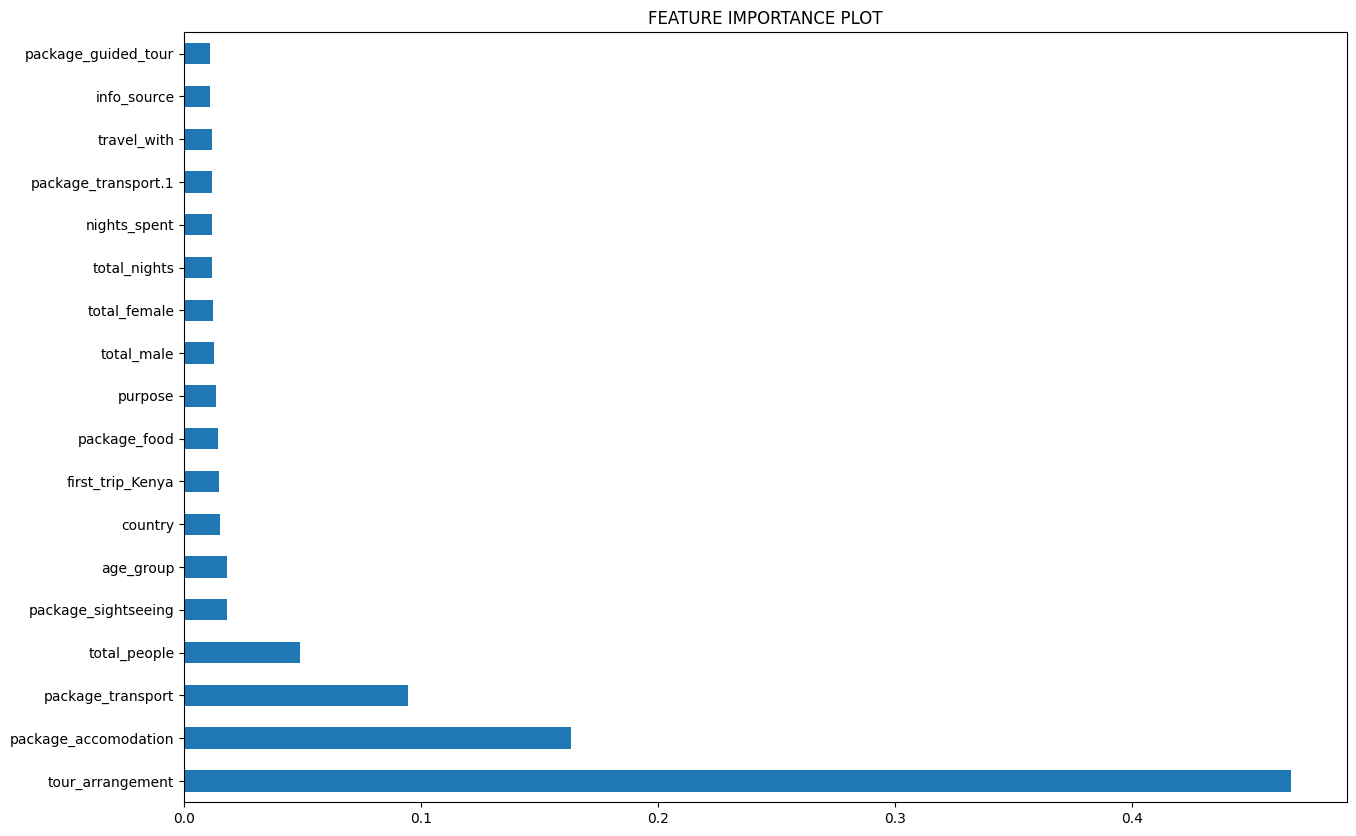

In [200]:
#Let's Visualize on the best contributed features
feat_importances = pd.Series(XGB_par.feature_importances_, index=cols)
plt.figure(figsize=(15,10))
plt.title("FEATURE IMPORTANCE PLOT")
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [215]:
import pickle


# Specify the filename
filename = 'tourism_pred_model'

# Open the file in write binary mode and dump the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)
    
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)


array([ 3.27197100e+06,  7.32596125e+05,  3.36206520e+07,  2.42236300e+07,
        1.44182490e+07,  1.96958720e+07,  6.08068450e+06,  1.57460500e+07,
        1.11408570e+07,  2.06288500e+07,  4.32768520e+07,  1.36404588e+06,
        1.58459510e+07,  5.33972150e+06,  6.27953950e+06,  3.42859800e+06,
        1.05431130e+07,  9.81365200e+06,  1.83051660e+07,  3.97009562e+05,
        9.27864100e+06,  8.87860400e+06, -2.36107959e+03,  4.27771840e+07,
        3.88174094e+05,  6.27447125e+05,  9.24591700e+06,  5.51155500e+06,
        3.02354000e+07,  8.85177000e+06,  1.98893760e+07,  9.24222800e+06,
        2.10941109e+05,  4.47474750e+06,  8.22210450e+06,  1.80937560e+07,
        3.04355500e+05,  2.80109200e+07,  9.10857000e+05,  1.34176238e+06,
        5.78251200e+06,  1.01100056e+06,  3.46363725e+06,  2.84920225e+06,
        2.69194240e+07,  7.64794062e+05,  4.58334050e+06,  2.39280940e+07,
        2.27149450e+06, -1.61950906e+05,  1.38043300e+07,  6.55908400e+06,
        1.83002880e+07,  